In [ ]:
!pip install transformers

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

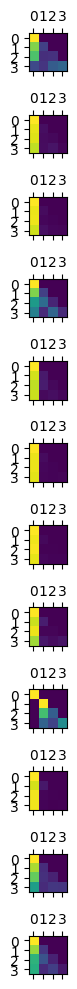

Size of word embedding matrix: torch.Size([50257, 768])
Size of position embedding matrix: torch.Size([1024, 768])
Number of self-attention layers: 12
Details of MLP layer: GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (act): NewGELUActivation()
  (dropout): Dropout(p=0.1, inplace=False)
)
Details of LM head: Linear(in_features=768, out_features=50257, bias=False)

Explanation:
model.generate(input_ids) is used for generating text. It takes the input IDs, processes them through the model, and continues generating tokens until a stopping criterion is reached.
model(input_ids) is used for a forward pass through the model without additional token generation. It's for processing inputs when the complete input sequence is known, like during evaluation or training.


In [ ]:
# GPT-2 Starter Code for Homework Assignment

import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import matplotlib.pyplot as plt

# Load pre-trained GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
# Output attention
model = GPT2LMHeadModel.from_pretrained('gpt2', output_attentions=True)
model.eval()

def visualize_attention(text):
    input_ids = tokenizer.encode(text, return_tensors='pt')

    # Forward pass, get attentions
    outputs = model(input_ids)
    attentions = outputs[-1]

    # Select attention from one of the layers, e.g., the last layer
    attention = attentions[-1][0]

    # Plot
    fig, axs = plt.subplots(len(attention), 1, figsize=(20, 10))
    for i, ax in enumerate(axs):
        ax.matshow(attention[i].detach().numpy(), cmap='viridis')

    plt.tight_layout()
    plt.show()

# Example usage
visualize_attention("Once upon a time")

# Locate word embedding matrix and position embedding matrix
word_embedding_matrix = model.transformer.wte.weight
position_embedding_matrix = model.transformer.wpe.weight

# Output their sizes
print(f"Size of word embedding matrix: {word_embedding_matrix.size()}")
print(f"Size of position embedding matrix: {position_embedding_matrix.size()}")

# Locate self-attention layers, MLP layers, and final decoding layer (LM head)
self_attention_layers = model.transformer.h
mlp_layers = [layer.mlp for layer in self_attention_layers]
lm_head = model.lm_head

# Output their details
print(f"Number of self-attention layers: {len(self_attention_layers)}")
print(f"Details of MLP layer: {mlp_layers[0]}")  # Example of details from the first MLP layer
print(f"Details of LM head: {lm_head}")

# Explain the difference between model.generate(input_ids) and model(input_ids)
print("\nExplanation:")
print("model.generate(input_ids) is used for generating text. It takes the input IDs, processes them through the model, and continues generating tokens until a stopping criterion is reached.")
print("model(input_ids) is used for a forward pass through the model without additional token generation. It's for processing inputs when the complete input sequence is known, like during evaluation or training.")

# Function to generate text
# def generate_text(prompt, max_length=50):
#     input_ids = tokenizer.encode(prompt, return_tensors='pt')
#     output = model.generate(input_ids, max_length=max_length, num_return_sequences=1, no_repeat_ngram_size=2)
#     return tokenizer.decode(output[0], skip_special_tokens=True)

# # Test the function with a prompt
# print(generate_text("Once upon a time"))


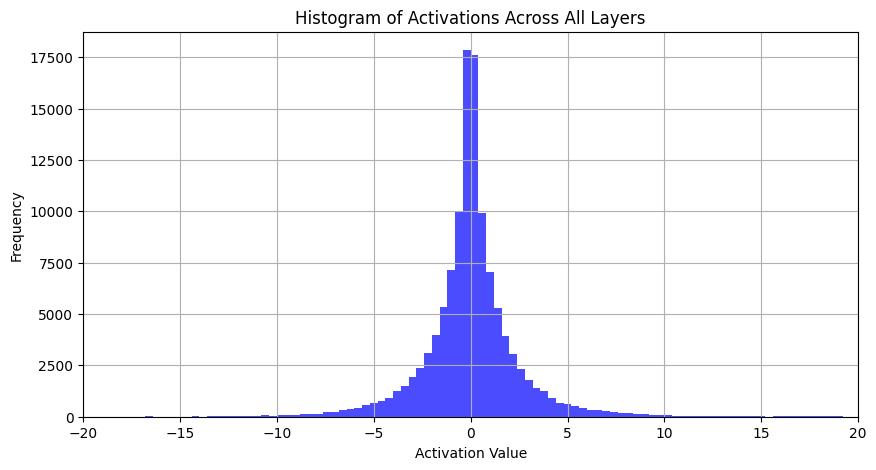

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2Model
import matplotlib.pyplot as plt

# Load pre-trained GPT-2 tokenizer and model with output_hidden_states set to True
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2', output_hidden_states=True)
model.eval()

# Encode a sample input sentence
input_text = "Once upon a time in a world far, far away,"
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Pass the encoded input through the model and collect hidden states
with torch.no_grad():
    outputs = model(input_ids)
    hidden_states = outputs.hidden_states  # Get hidden states from all layers

# Collect the activations from all layers
activations = torch.cat([hidden_state.squeeze(0) for hidden_state in hidden_states], dim=0)

# Flatten the activations to create a histogram
flattened_activations = activations.flatten().numpy()

# Define the range of interest for activation values
activation_range = (-20, 20)

# Create a histogram with the specified range
plt.figure(figsize=(10, 5))
plt.hist(flattened_activations, bins=100, color='blue', alpha=0.7, range=activation_range)
plt.title('Histogram of Activations Across All Layers')
plt.xlabel('Activation Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(activation_range)  # Set the x-axis limits to the range of interest
plt.show()


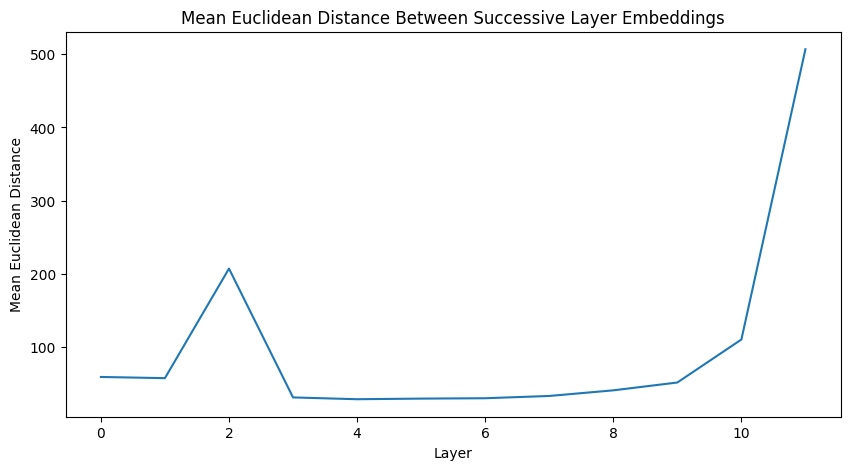

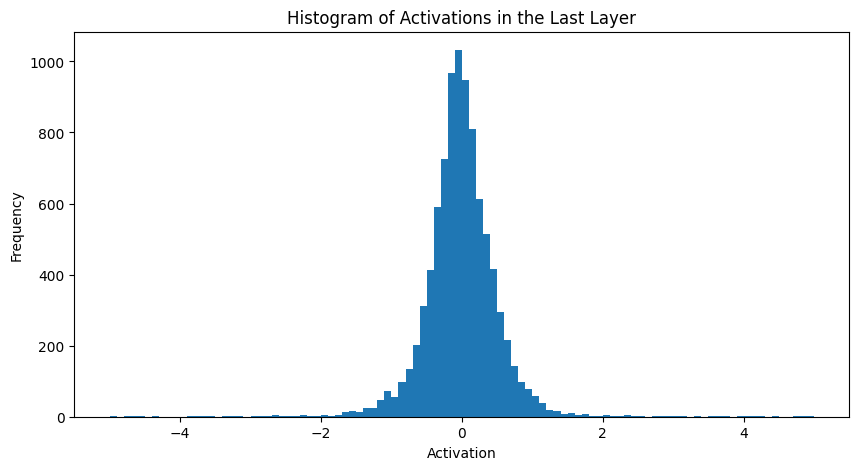

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2Model
import matplotlib.pyplot as plt
import numpy as np

# Load pre-trained GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2', output_hidden_states=True)  # Set to output hidden states
model.eval()

# 1. Encode a sample input sentence
input_text = "Once upon a time in a world far, far away,"
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# 2. Pass the encoded input through the model
with torch.no_grad():
    outputs = model(input_ids)

# 3. Extract hidden states
hidden_states = outputs.hidden_states

# Calculate the Euclidean distance between successive layer embeddings
distances = []
for layer in range(len(hidden_states) - 1):
    dist = torch.norm(hidden_states[layer + 1] - hidden_states[layer], dim=2)
    distances.append(dist.mean().item())

# 4. Visualize changes in embeddings across layers
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('Mean Euclidean Distance Between Successive Layer Embeddings')
plt.xlabel('Layer')
plt.ylabel('Mean Euclidean Distance')
plt.show()

activation_range = (-5, 5)
# 5. Histogram of the activations across layers
layer_activations = hidden_states[-1].squeeze(0).numpy()  # Use last layer for histogram
plt.figure(figsize=(10, 5))
plt.hist(layer_activations.flatten(), bins=100, range = activation_range)
plt.title('Histogram of Activations in the Last Layer')
plt.xlabel('Activation')
plt.ylabel('Frequency')
plt.show()

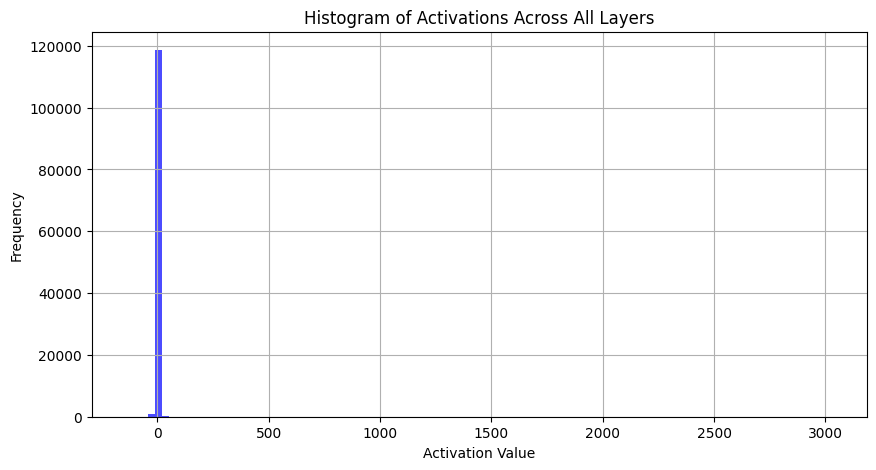

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2Model
import matplotlib.pyplot as plt

# Load pre-trained GPT-2 tokenizer and model with output_hidden_states set to True
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2', output_hidden_states=True)
model.eval()

# Encode a sample input sentence
input_text = "Once upon a time in a world far, far away,"
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Pass the encoded input through the model and collect hidden states
with torch.no_grad():
    outputs = model(input_ids)

hidden_states = outputs.hidden_states  # Get hidden states from all layers

# Collect the activations from all layers
activations = torch.cat([hidden_state.squeeze(0) for hidden_state in hidden_states], dim=0)

# Flatten the activations to create a histogram
flattened_activations = activations.flatten().numpy()

# Create a histogram from these flattened activations
plt.figure(figsize=(10, 5))
plt.hist(flattened_activations, bins=100, color='blue', alpha=0.7)
plt.title('Histogram of Activations Across All Layers')
plt.xlabel('Activation Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


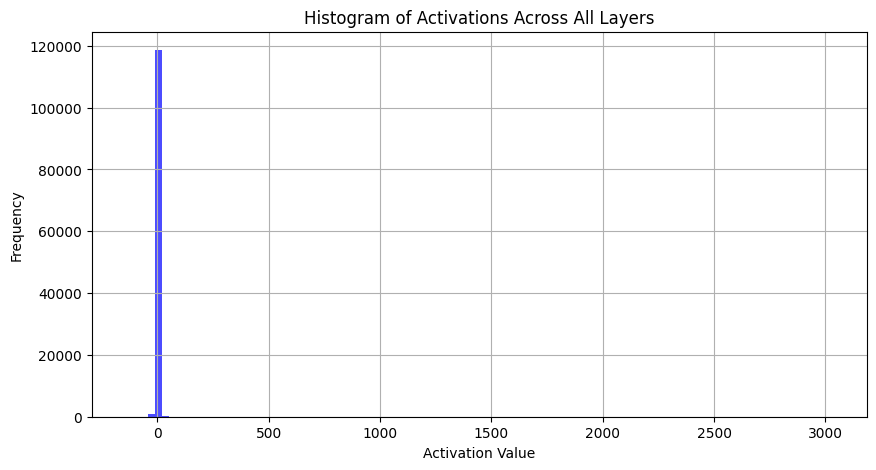

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2Model
import matplotlib.pyplot as plt
import numpy as np

# Load pre-trained GPT-2 tokenizer and model with output_hidden_states set to True
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2', output_hidden_states=True)
model.eval()

# Encode a sample input sentence
input_text = "Once upon a time in a world far, far away,"
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Pass the encoded input through the model and collect hidden states
with torch.no_grad():
    outputs = model(input_ids)
    hidden_states = outputs.hidden_states  # Get hidden states from all layers

# Collect the activations from all layers
activations = torch.cat([hidden_state.squeeze(0) for hidden_state in hidden_states], dim=0)

# Flatten the activations to create a histogram
flattened_activations = activations.flatten().numpy()

# Calculate the range of activations
min_activation = flattened_activations.min()
max_activation = flattened_activations.max()

# Define the number of bins for the histogram
num_bins = 100  # You can adjust this number as needed to increase or decrease the granularity of the histogram

# Create a histogram with the new range and bins
plt.figure(figsize=(10, 5))
plt.hist(flattened_activations, bins=num_bins, color='blue', alpha=0.7, range=(min_activation, max_activation))
plt.title('Histogram of Activations Across All Layers')
plt.xlabel('Activation Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


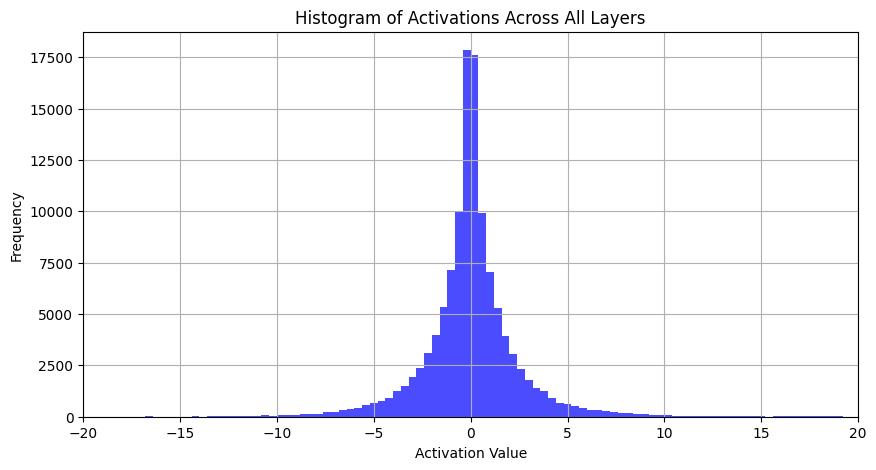

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2Model
import matplotlib.pyplot as plt

# Load pre-trained GPT-2 tokenizer and model with output_hidden_states set to True
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2', output_hidden_states=True)
model.eval()

# Encode a sample input sentence
input_text = "Once upon a time in a world far, far away,"
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Pass the encoded input through the model and collect hidden states
with torch.no_grad():
    outputs = model(input_ids)
    hidden_states = outputs.hidden_states  # Get hidden states from all layers

# Collect the activations from all layers
activations = torch.cat([hidden_state.squeeze(0) for hidden_state in hidden_states], dim=0)

# Flatten the activations to create a histogram
flattened_activations = activations.flatten().numpy()

# Define the range of interest for activation values
activation_range = (-20, 20)

# Create a histogram with the specified range
plt.figure(figsize=(10, 5))
plt.hist(flattened_activations, bins=100, color='blue', alpha=0.7, range=activation_range)
plt.title('Histogram of Activations Across All Layers')
plt.xlabel('Activation Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(activation_range)  # Set the x-axis limits to the range of interest
plt.show()
